In [353]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import io
import pandas as pd

In [354]:
# read state highway system
shs=gpd.read_file('C:/GIS/AADT Analysis/SHS.json')
shs_proj_link=shs.to_crs("EPSG:3310")
shs_proj=shs.to_crs("EPSG:3310")
shs_proj.head()

,id,shape_leng,route,rtesuffix,routes,routeid,county,district,pmprefix,bpm,epm,pmsuffix,bodometer,eodometer,aligncode,routetype,geometry
0,xc453kn9742.1,0.043795,90,None,90,90_20140130_R,ORA,12,None,5.603,8.147,None,8.425,10.969,Right,State,"MULTILINESTRING ((195970.763 -453881.549, 1960..."
1,xc453kn9742.2,0.746687,127,None,127,127_20080130_R,INY,9,None,0.000,49.420,None,41.613,91.033,Right,State,"MULTILINESTRING ((330353.418 -240641.285, 3303..."
2,xc453kn9742.3,0.141689,15,None,15,15_20080130_R,SBD,8,R,13.779,22.891,None,123.148,132.260,Right,Interstate,"MULTILINESTRING ((238606.843 -417929.525, 2385..."
3,xc453kn9742.4,0.004341,111,None,111,111_20120130_R,IMP,11,R,0.000,0.273,None,0.000,0.273,Right,State,"MULTILINESTRING ((422959.785 -584084.468, 4229..."
4,xc453kn9742.5,0.426444,33,None,33,33_20140130_L,STA,10,None,0.000,27.086,None,257.761,284.847,Left,State,"MULTILINESTRING ((-89959.217 -78674.661, -8999..."


In [355]:
shs_proj.columns

Index(['id', 'shape_leng', 'route', 'rtesuffix', 'routes', 'routeid', 'county',
       'district', 'pmprefix', 'bpm', 'epm', 'pmsuffix', 'bodometer',
       'eodometer', 'aligncode', 'routetype', 'geometry'],
      dtype='object')

In [356]:
# read aadt file
aadt=gpd.read_file('C:/GIS/AADT Analysis/Traffic_Volumes_AADT.geojson')

# project the shape file to meter co-ordinate system
aadt_proj=aadt.to_crs("EPSG:3310")
aadt.head()

,OBJECTID,DISTRICT,ROUTE,ROUTE_SFX,COUNTY,PM_PFX,PM,PM_SFX,LOCATION_DESCRIPTION,BACK_PEAK_HOUR,BACK_PEAK_MADT,BACK_AADT,AHEAD_PEAK_HOUR,AHEAD_PEAK_MADT,AHEAD_AADT,geometry
0,1,11,5,,SD,R,30.345,L,BEG INDEP ALIGN LT LNS,8600.0,94000.0,80000.0,3850.0,51000.0,46000.0,POINT (-117.225 32.89966)
1,2,11,5,,SD,R,30.426,L,"SAN DIEGO, SORRENTO VALLEY ROAD",4200.0,55000.0,50000.0,3800.0,46500.0,40000.0,POINT (-117.22467 32.90081)
2,3,11,5,,SD,R,30.682,L,"SAN DIEGO, NORTH JCT RTE 805",6500.0,82000.0,70000.0,4700.0,63000.0,60000.0,POINT (-117.22482 32.9045)
3,4,11,5,,SD,R,31.155,L,"R31.155 EQUATES R31.188, END INDEP ALIGN",8400.0,104000.0,81000.0,,,,POINT (-117.22822 32.91065)
4,5,12,5,,ORA,,41.84,L,BEG INDEP ALIGN LT LNS,19200.0,243000.0,223000.0,11600.0,147000.0,133900.0,POINT (-117.97515 33.85399)


In [357]:
# check the CRS for both file
aadt.crs, shs.crs

(<Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

In [358]:
# consider 30 meter buffer around the link
shs_proj['geometry'] = shs_proj.buffer(30)
shs_proj.head()

,id,shape_leng,route,rtesuffix,routes,routeid,county,district,pmprefix,bpm,epm,pmsuffix,bodometer,eodometer,aligncode,routetype,geometry
0,xc453kn9742.1,0.043795,90,None,90,90_20140130_R,ORA,12,None,5.603,8.147,None,8.425,10.969,Right,State,"POLYGON ((196008.025 -453849.722, 196050.575 -..."
1,xc453kn9742.2,0.746687,127,None,127,127_20080130_R,INY,9,None,0.000,49.420,None,41.613,91.033,Right,State,"POLYGON ((330319.906 -240637.031, 330319.026 -..."
2,xc453kn9742.3,0.141689,15,None,15,15_20080130_R,SBD,8,R,13.779,22.891,None,123.148,132.260,Right,Interstate,"POLYGON ((238558.605 -417931.303, 238557.741 -..."
3,xc453kn9742.4,0.004341,111,None,111,111_20120130_R,IMP,11,R,0.000,0.273,None,0.000,0.273,Right,State,"POLYGON ((422934.625 -584103.667, 422931.245 -..."
4,xc453kn9742.5,0.426444,33,None,33,33_20140130_L,STA,10,None,0.000,27.086,None,257.761,284.847,Left,State,"POLYGON ((-90657.764 -76480.595, -90658.233 -7..."


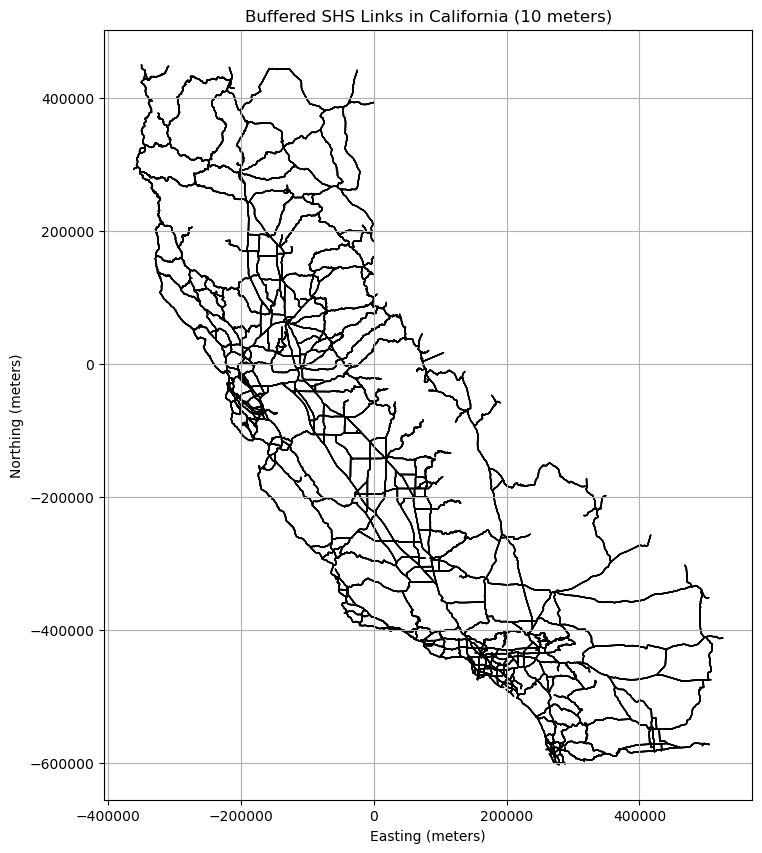

In [359]:
# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))
shs_proj.plot(ax=ax, color="lightblue", edgecolor="black")

# Customize the plot
ax.set_title("Buffered SHS Links in California (10 meters)")
ax.set_xlabel("Easting (meters)")
ax.set_ylabel("Northing (meters)")
plt.grid(True)
plt.show()

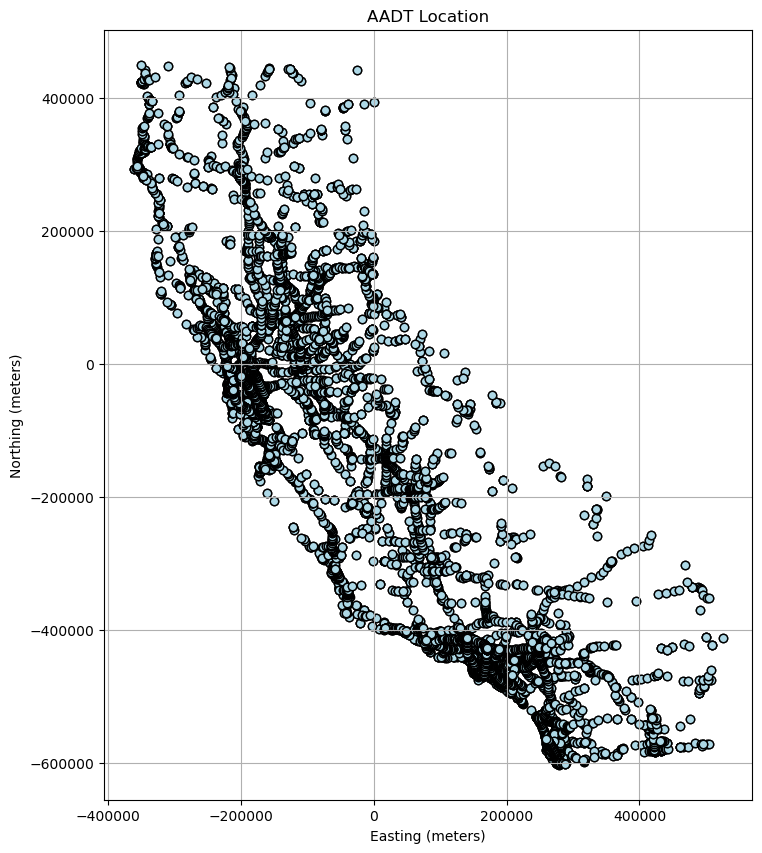

In [360]:
# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))
aadt_proj.plot(ax=ax, color="lightblue", edgecolor="black")
# Customize the plot
ax.set_title("AADT Location")
ax.set_xlabel("Easting (meters)")
ax.set_ylabel("Northing (meters)")
plt.grid(True)
plt.show()

<Axes: >

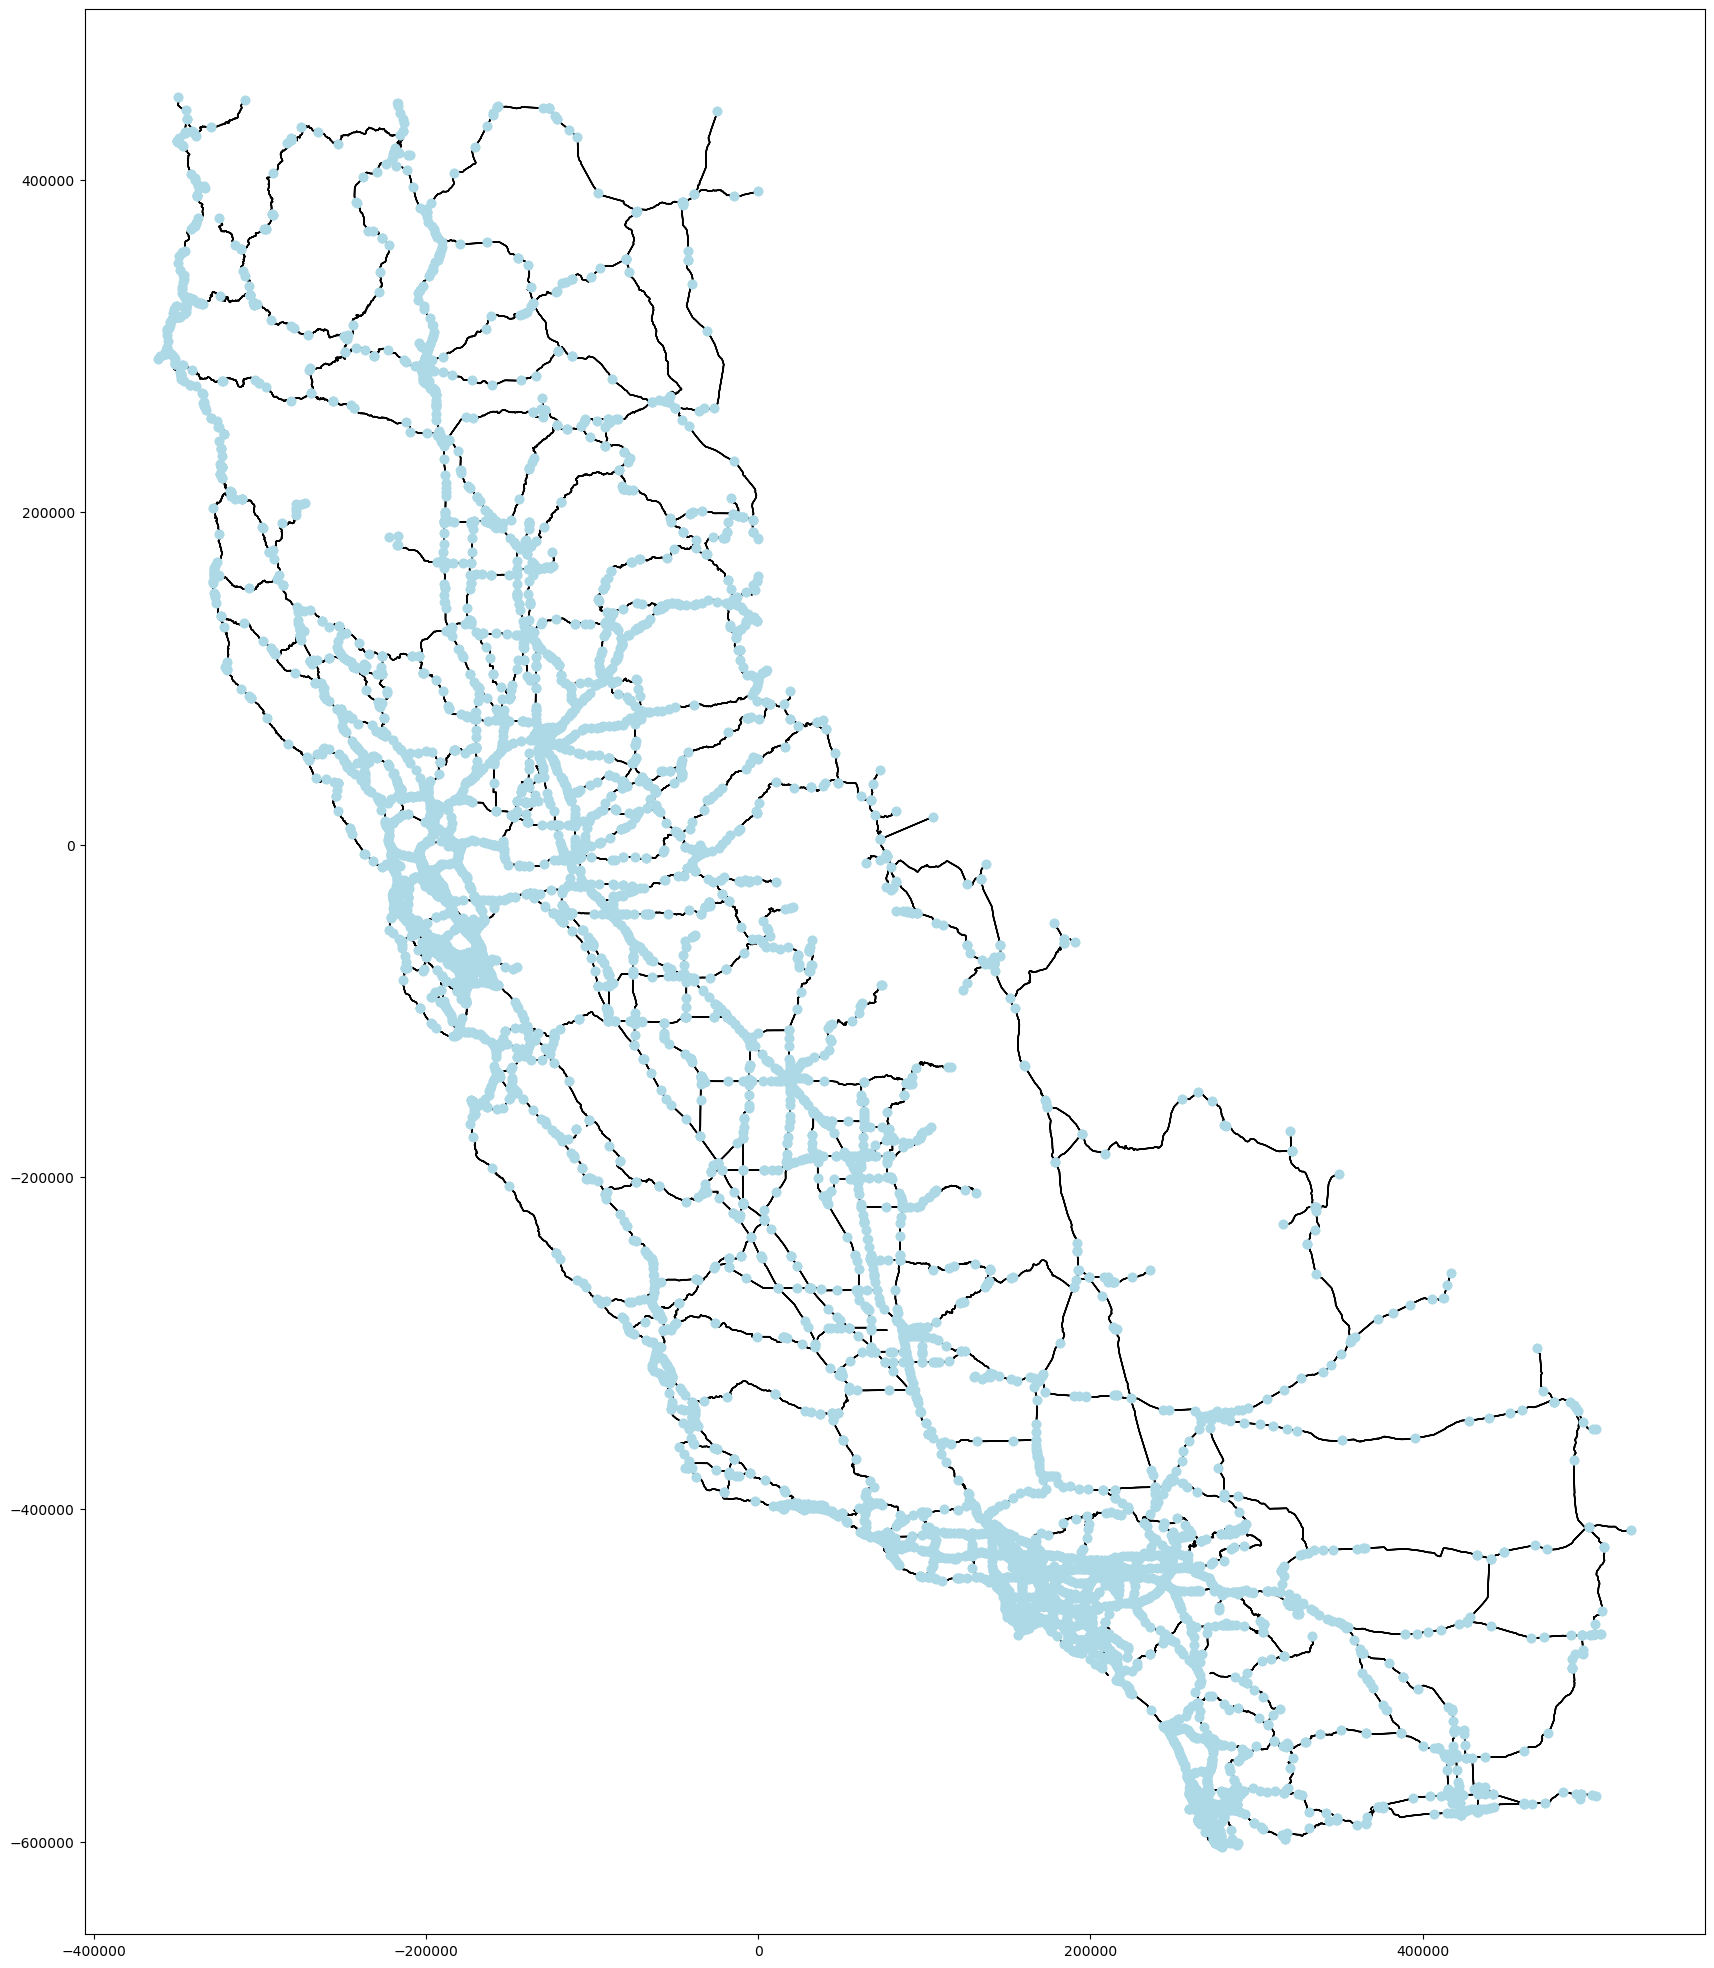

In [361]:
fig, ax = plt.subplots(figsize = (30,25)) 
shs_proj.plot(ax=ax,color="red",edgecolor='k',linewidth = 1)
aadt_proj.plot(color="lightblue",ax=ax) #Use your second dataframe

In [362]:
#Now do the spatial join with aadt point data
shs_aadt_joined = gpd.sjoin(aadt_proj, shs_proj, predicate="within", how="inner")
shs_aadt_joined['DISTRICT'] = pd.to_numeric(shs_aadt_joined['DISTRICT'], errors='coerce')
shs_aadt_joined['ROUTE'] = pd.to_numeric(shs_aadt_joined['ROUTE'], errors='coerce')
shs_aadt_joined.head()

,OBJECTID,DISTRICT,ROUTE,ROUTE_SFX,COUNTY,PM_PFX,PM,PM_SFX,LOCATION_DESCRIPTION,BACK_PEAK_HOUR,...,county,district,pmprefix,bpm,epm,pmsuffix,bodometer,eodometer,aligncode,routetype
0,1,11,5,,SD,R,30.345,L,BEG INDEP ALIGN LT LNS,8600.0,...,SD,11,R,14.859,30.345,None,14.535,30.021,Left,Interstate
0,1,11,5,,SD,R,30.345,L,BEG INDEP ALIGN LT LNS,8600.0,...,SD,11,R,30.345,31.155,L,30.021,30.831,Left Split Align,Interstate
1,2,11,5,,SD,R,30.426,L,"SAN DIEGO, SORRENTO VALLEY ROAD",4200.0,...,SD,11,R,30.345,31.155,L,30.021,30.831,Left Split Align,Interstate
2,3,11,5,,SD,R,30.682,L,"SAN DIEGO, NORTH JCT RTE 805",6500.0,...,SD,11,R,30.345,31.155,L,30.021,30.831,Left Split Align,Interstate
3,4,11,5,,SD,R,31.155,L,"R31.155 EQUATES R31.188, END INDEP ALIGN",8400.0,...,SD,11,R,30.345,31.155,L,30.021,30.831,Left Split Align,Interstate


In [363]:
shs_aadt_joined.dtypes

OBJECTID                   int32
DISTRICT                   int64
ROUTE                      int64
ROUTE_SFX                 object
COUNTY                    object
PM_PFX                    object
PM                        object
PM_SFX                    object
LOCATION_DESCRIPTION      object
BACK_PEAK_HOUR            object
BACK_PEAK_MADT            object
BACK_AADT                 object
AHEAD_PEAK_HOUR           object
AHEAD_PEAK_MADT           object
AHEAD_AADT                object
geometry                geometry
index_right                int64
id                        object
shape_leng               float64
route                      int32
rtesuffix                 object
routes                    object
routeid                   object
county                    object
district                   int32
pmprefix                  object
bpm                      float64
epm                      float64
pmsuffix                  object
bodometer                float64
eodometer 

In [364]:
# check the data shape
shs_aadt_joined.shape, shs_proj.shape, aadt_proj.shape

((33645, 33), (5092, 17), (13874, 16))

In [365]:
# Now filter out more based on route, county, district, and PM prefix to avoid any mis match
def qc(shs_proj, aadt_proj):
    # Check if the specified columns match between the two dataframes
    if (shs_proj['route'] == aadt_proj['ROUTE'] and
        shs_proj['county'] == aadt_proj['COUNTY'] and
        shs_proj['district'] == aadt_proj['DISTRICT']): #and
        #shs_proj['pmprefix'] == aadt_proj['PM_PFX']): # and
        #shs_proj['pmsuffix'] == aadt_proj['PM_SFX']):
        return True
    else:
        return False
    

In [366]:
# Apply the QC function to each row of the GeoDataFrame
shs_aadt_joined['Qualified'] = shs_aadt_joined.apply(lambda row: qc(row, row), axis=1)
shs_aadt_joined.head()

,OBJECTID,DISTRICT,ROUTE,ROUTE_SFX,COUNTY,PM_PFX,PM,PM_SFX,LOCATION_DESCRIPTION,BACK_PEAK_HOUR,...,district,pmprefix,bpm,epm,pmsuffix,bodometer,eodometer,aligncode,routetype,Qualified
0,1,11,5,,SD,R,30.345,L,BEG INDEP ALIGN LT LNS,8600.0,...,11,R,14.859,30.345,None,14.535,30.021,Left,Interstate,True
0,1,11,5,,SD,R,30.345,L,BEG INDEP ALIGN LT LNS,8600.0,...,11,R,30.345,31.155,L,30.021,30.831,Left Split Align,Interstate,True
1,2,11,5,,SD,R,30.426,L,"SAN DIEGO, SORRENTO VALLEY ROAD",4200.0,...,11,R,30.345,31.155,L,30.021,30.831,Left Split Align,Interstate,True
2,3,11,5,,SD,R,30.682,L,"SAN DIEGO, NORTH JCT RTE 805",6500.0,...,11,R,30.345,31.155,L,30.021,30.831,Left Split Align,Interstate,True
3,4,11,5,,SD,R,31.155,L,"R31.155 EQUATES R31.188, END INDEP ALIGN",8400.0,...,11,R,30.345,31.155,L,30.021,30.831,Left Split Align,Interstate,True


In [367]:
shs_aadt_joined.groupby(['Qualified'])['Qualified'].count()

Qualified
False     7444
True     26201
Name: Qualified, dtype: int64

<Axes: >

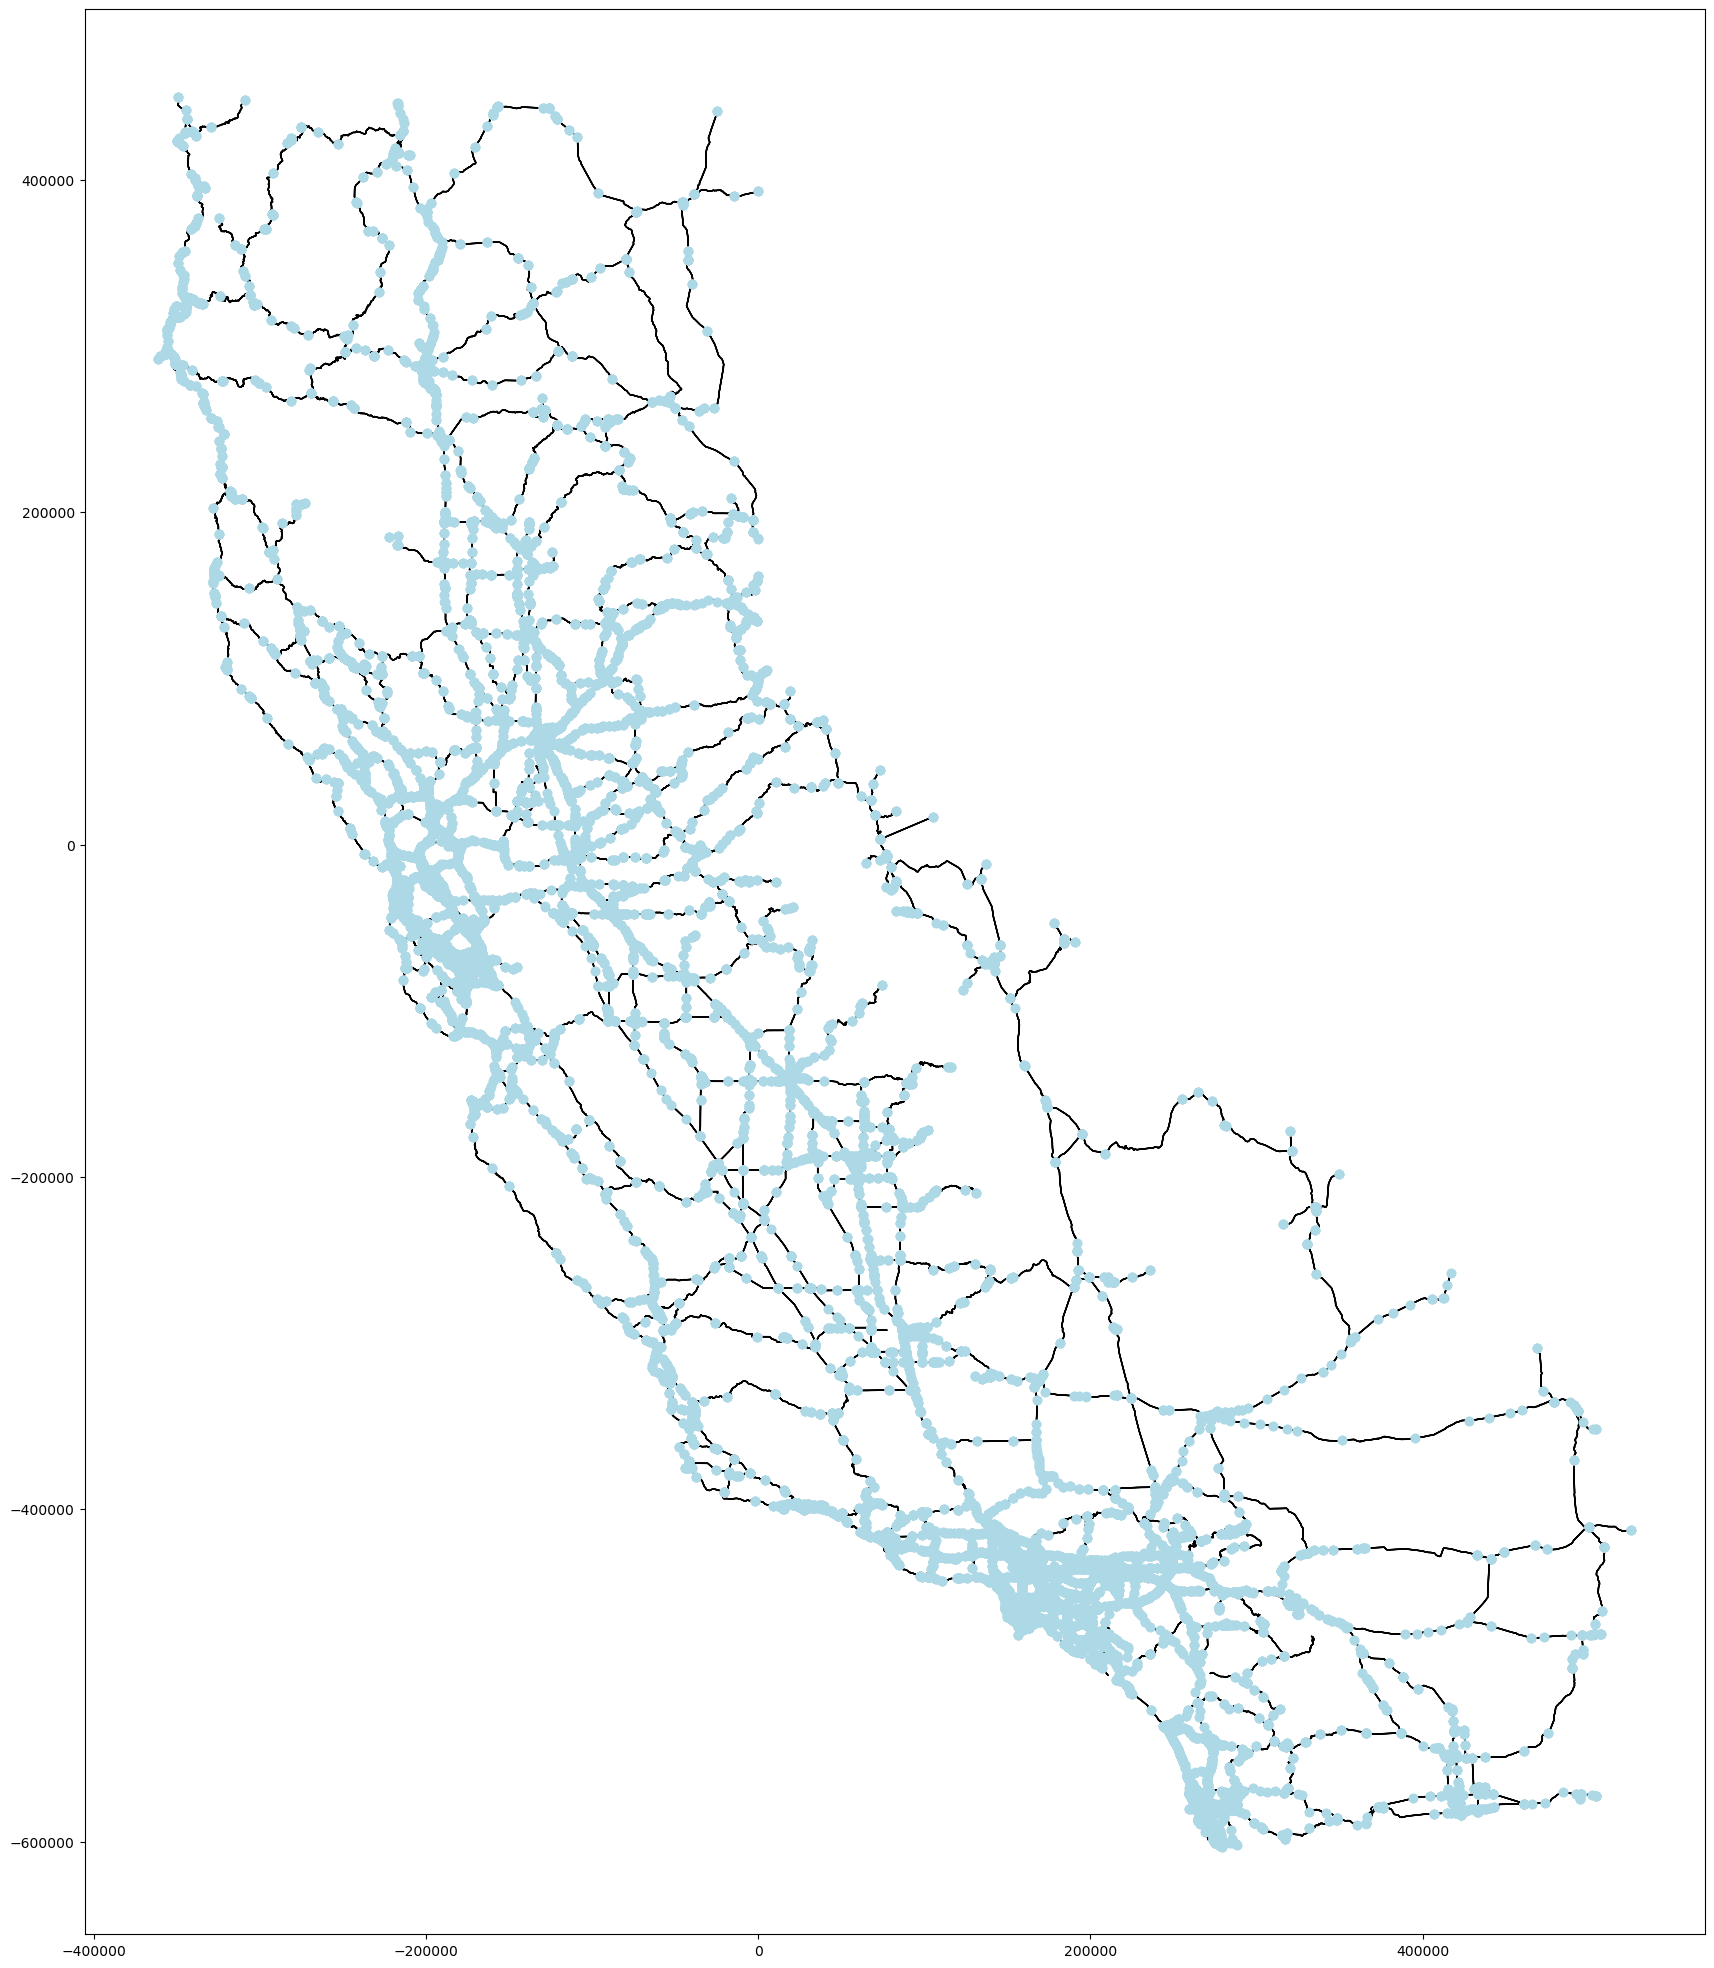

In [368]:
# lets plot to see for which link we get the copunt
fig, ax = plt.subplots(figsize = (30,25)) 
shs_proj.plot(ax=ax,color="red",edgecolor='k',linewidth = 1)
shs_aadt_joined.plot(color="lightblue",ax=ax) #Use your second dataframe

In [369]:
# Lets consider only qualified count
qualified_count_segment=shs_aadt_joined.loc[shs_aadt_joined['Qualified']==True]
qualified_count_segment.head()

,OBJECTID,DISTRICT,ROUTE,ROUTE_SFX,COUNTY,PM_PFX,PM,PM_SFX,LOCATION_DESCRIPTION,BACK_PEAK_HOUR,...,district,pmprefix,bpm,epm,pmsuffix,bodometer,eodometer,aligncode,routetype,Qualified
0,1,11,5,,SD,R,30.345,L,BEG INDEP ALIGN LT LNS,8600.0,...,11,R,14.859,30.345,None,14.535,30.021,Left,Interstate,True
0,1,11,5,,SD,R,30.345,L,BEG INDEP ALIGN LT LNS,8600.0,...,11,R,30.345,31.155,L,30.021,30.831,Left Split Align,Interstate,True
1,2,11,5,,SD,R,30.426,L,"SAN DIEGO, SORRENTO VALLEY ROAD",4200.0,...,11,R,30.345,31.155,L,30.021,30.831,Left Split Align,Interstate,True
2,3,11,5,,SD,R,30.682,L,"SAN DIEGO, NORTH JCT RTE 805",6500.0,...,11,R,30.345,31.155,L,30.021,30.831,Left Split Align,Interstate,True
3,4,11,5,,SD,R,31.155,L,"R31.155 EQUATES R31.188, END INDEP ALIGN",8400.0,...,11,R,30.345,31.155,L,30.021,30.831,Left Split Align,Interstate,True


In [370]:
qualified_count_segment.columns

Index(['OBJECTID', 'DISTRICT', 'ROUTE', 'ROUTE_SFX', 'COUNTY', 'PM_PFX', 'PM',
       'PM_SFX', 'LOCATION_DESCRIPTION', 'BACK_PEAK_HOUR', 'BACK_PEAK_MADT',
       'BACK_AADT', 'AHEAD_PEAK_HOUR', 'AHEAD_PEAK_MADT', 'AHEAD_AADT',
       'geometry', 'index_right', 'id', 'shape_leng', 'route', 'rtesuffix',
       'routes', 'routeid', 'county', 'district', 'pmprefix', 'bpm', 'epm',
       'pmsuffix', 'bodometer', 'eodometer', 'aligncode', 'routetype',
       'Qualified'],
      dtype='object')

In [371]:
qualified_count_segment['BACK_AADT'] = pd.to_numeric(qualified_count_segment['BACK_AADT'], errors='coerce')
qualified_count_segment['AHEAD_AADT'] = pd.to_numeric(qualified_count_segment['AHEAD_AADT'], errors='coerce')

# Assuming qualified_count_segment is your DataFrame with the required columns

# Group by relevant identifiers
grouped = qualified_count_segment.groupby(['id'])

# Aggregate to count AADT points and calculate statistics
summary = grouped.agg(
    aadt_count=('OBJECTID', 'count'),  # Count number of AADT points
    back_aadt_mean=('BACK_AADT', 'mean'),  # Mean for BACK_AADT
    back_aadt_min=('BACK_AADT', 'min'),    # Min for BACK_AADT
    back_aadt_max=('BACK_AADT', 'max'),    # Max for BACK_AADT
    ahead_aadt_mean=('AHEAD_AADT', 'mean'),  # Mean for AHEAD_AADT
    ahead_aadt_min=('AHEAD_AADT', 'min'),    # Min for AHEAD_AADT
    ahead_aadt_max=('AHEAD_AADT', 'max')      # Max for AHEAD_AADT
).reset_index()

# Display the resulting summary DataFrame
summary.head()


C:\Users\s160555\AppData\Local\anaconda3\envs\geo_env\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,id,aadt_count,back_aadt_mean,back_aadt_min,back_aadt_max,ahead_aadt_mean,ahead_aadt_min,ahead_aadt_max
0,xc453kn9742.1,4,51850.000000,42700.0,61000.0,46350.000000,42700.0,50000.0
1,xc453kn9742.1000,7,11757.142857,8900.0,14000.0,11020.000000,7400.0,13300.0
2,xc453kn9742.1001,6,4925.000000,4450.0,5400.0,5316.666667,4000.0,7600.0
3,xc453kn9742.1002,16,60125.000000,39000.0,102000.0,52312.500000,34500.0,77000.0
4,xc453kn9742.1003,4,1250.000000,1250.0,1250.0,1200.000000,1200.0,1200.0


In [372]:
summary.shape

(3660, 8)

In [373]:
# Now bring the shs segment geometry with the process file
shs_link=shs_proj_link
shs_link.head()

,id,shape_leng,route,rtesuffix,routes,routeid,county,district,pmprefix,bpm,epm,pmsuffix,bodometer,eodometer,aligncode,routetype,geometry
0,xc453kn9742.1,0.043795,90,None,90,90_20140130_R,ORA,12,None,5.603,8.147,None,8.425,10.969,Right,State,"MULTILINESTRING ((195970.763 -453881.549, 1960..."
1,xc453kn9742.2,0.746687,127,None,127,127_20080130_R,INY,9,None,0.000,49.420,None,41.613,91.033,Right,State,"MULTILINESTRING ((330353.418 -240641.285, 3303..."
2,xc453kn9742.3,0.141689,15,None,15,15_20080130_R,SBD,8,R,13.779,22.891,None,123.148,132.260,Right,Interstate,"MULTILINESTRING ((238606.843 -417929.525, 2385..."
3,xc453kn9742.4,0.004341,111,None,111,111_20120130_R,IMP,11,R,0.000,0.273,None,0.000,0.273,Right,State,"MULTILINESTRING ((422959.785 -584084.468, 4229..."
4,xc453kn9742.5,0.426444,33,None,33,33_20140130_L,STA,10,None,0.000,27.086,None,257.761,284.847,Left,State,"MULTILINESTRING ((-89959.217 -78674.661, -8999..."


In [374]:
# add the segment geometry of the segment
shs_aadt_joined2=pd.merge(shs_link,summary, on=['id'], how='inner')
shs_aadt_joined2.head()

,id,shape_leng,route,rtesuffix,routes,routeid,county,district,pmprefix,bpm,...,aligncode,routetype,geometry,aadt_count,back_aadt_mean,back_aadt_min,back_aadt_max,ahead_aadt_mean,ahead_aadt_min,ahead_aadt_max
0,xc453kn9742.1,0.043795,90,None,90,90_20140130_R,ORA,12,None,5.603,...,Right,State,"MULTILINESTRING ((195970.763 -453881.549, 1960...",4,51850.000000,42700.0,61000.0,46350.000000,42700.0,50000.0
1,xc453kn9742.2,0.746687,127,None,127,127_20080130_R,INY,9,None,0.000,...,Right,State,"MULTILINESTRING ((330353.418 -240641.285, 3303...",16,775.714286,340.0,1460.0,754.285714,340.0,1150.0
2,xc453kn9742.3,0.141689,15,None,15,15_20080130_R,SBD,8,R,13.779,...,Right,Interstate,"MULTILINESTRING ((238606.843 -417929.525, 2385...",5,164600.000000,139000.0,187000.0,173600.000000,162000.0,187000.0
3,xc453kn9742.4,0.004341,111,None,111,111_20120130_R,IMP,11,R,0.000,...,Right,State,"MULTILINESTRING ((422959.785 -584084.468, 4229...",5,31000.000000,31000.0,31000.0,32800.000000,31000.0,35500.0
4,xc453kn9742.5,0.426444,33,None,33,33_20140130_L,STA,10,None,0.000,...,Left,State,"MULTILINESTRING ((-89959.217 -78674.661, -8999...",32,5834.375000,3000.0,9100.0,5263.333333,2500.0,8400.0


In [375]:
shs_aadt_joined2.shape

(3660, 24)

<Axes: >

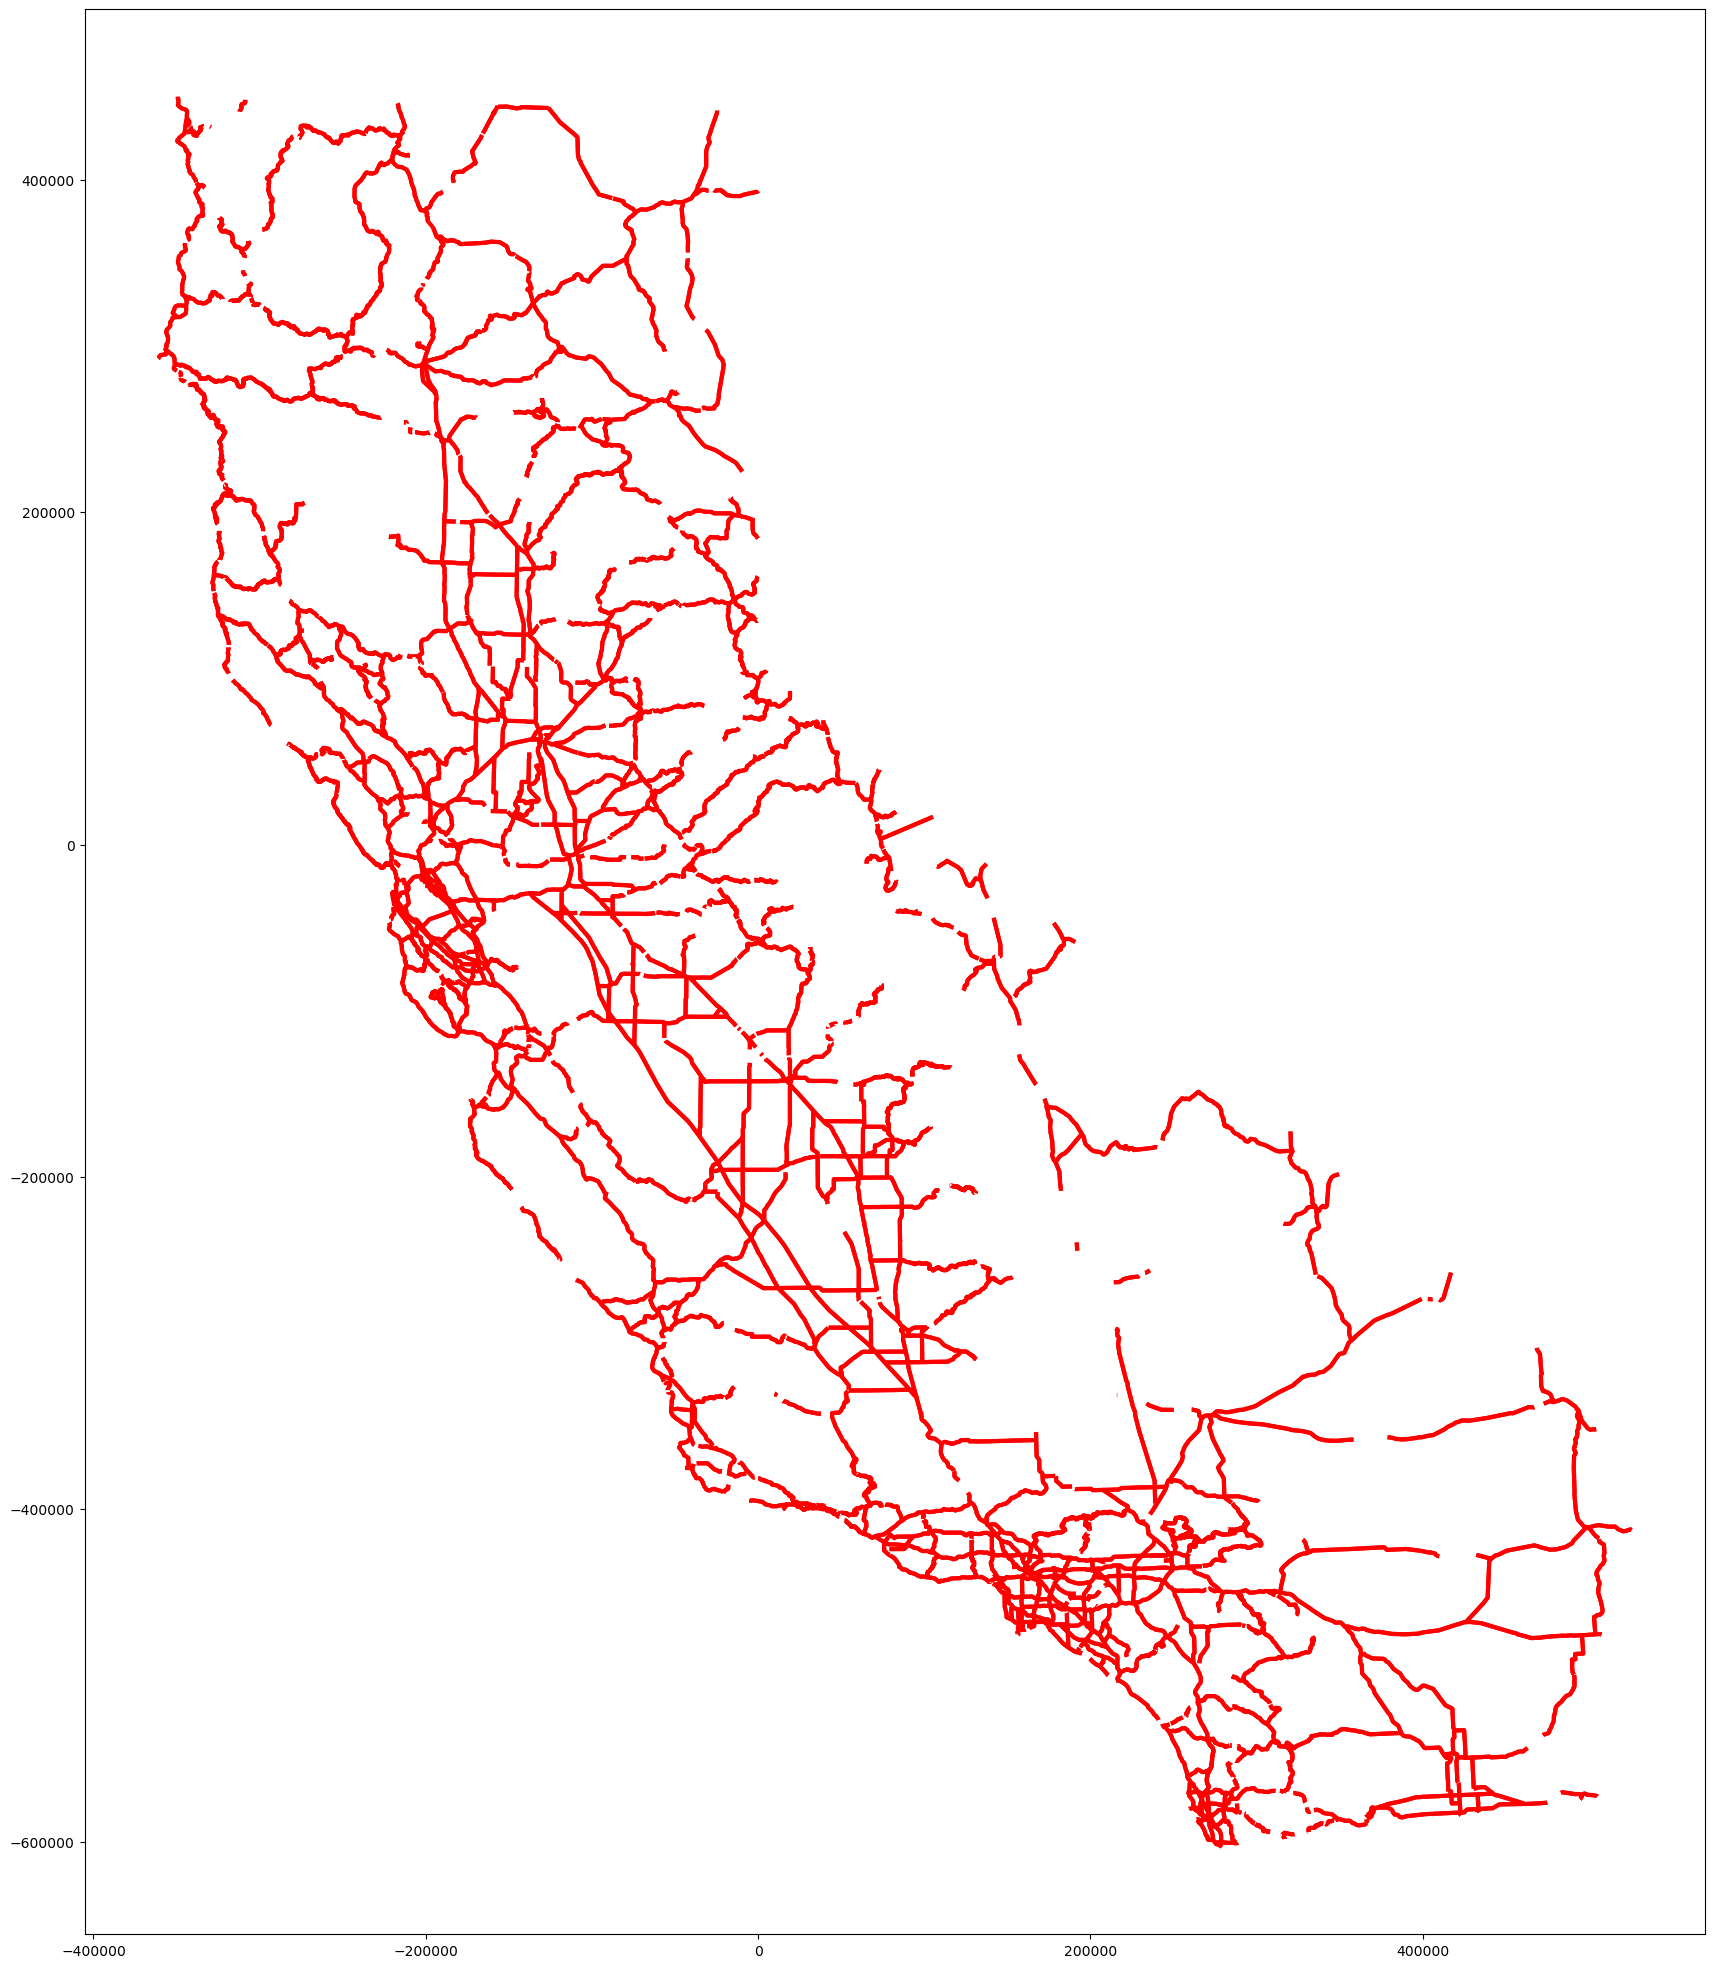

In [376]:
# lets plot to see for which link we get the copunt
fig, ax = plt.subplots(figsize = (30,25)) 
shs_aadt_joined2.plot(ax=ax,color="red",edgecolor='k',linewidth = 3)

In [377]:
summary_gdf = gpd.GeoDataFrame(shs_aadt_joined2, geometry='geometry', crs="EPSG:3310")
# Transform CRS to EPSG:4326
summary_gdf_4326 = summary_gdf.to_crs("EPSG:4326")
# Save as GeoJSON
crs = {'init': 'epsg:4326'}
final_data = gpd.GeoDataFrame(summary_gdf_4326, crs=crs, geometry = 'geometry')
final_data.to_file("link_level_vehicle_aadt_epsg_4326.json", driver="GeoJSON")

C:\Users\s160555\AppData\Local\anaconda3\envs\geo_env\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [378]:
#end of the script